# CME538 - Introduction to Data Science

# Tutorial 7
## 	Linear Regression

By Marc Saleh, Navid Kayhani

### Prediction of car prices

Our client wants to enter the Canadian car market by setting up their manufacturing unit here. They need to understand how car prices vary depending on their features. They can accordingly manipulate the design of the cars, the business strategy, etc., to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

They have contracted us to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the Canadian market.

The client wants to know:
1. Which variables are significant in predicting the price of a car?
2. How well do those variables describe the price?

We have gathered a dataset of different types of cars in the Canadian market based on a market survey.


<a id='section0'></a>
### Setup Notebook
At the start of a notebook, we need to import the Python packages we plan to use.


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ML: linear regression 
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 


### Read in data

In [2]:
cars = #write your code
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Look at the data

In [3]:
#write your code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

1. car_ID : Unique ID for each observation
2. symboling : Its assigned insurance risk rating
            A value of +3 indicates that the auto is risky,
            -3 that it is probably pretty safe.(Categorical)

### Data Cleaning and Preparation 

In [5]:
#Splitting company name from CarName column
cars['CompanyName'] = #write your code

In [6]:
cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
# replace invalid names
def replace_name(a,b):
    '''
    Replaces company name a by b
    '''
    #write your code

replace_name('maxda','mazda')
replace_name('Nissan','nissan')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Exploratory data analysis

#### Plot price distribution and boxplot of cars

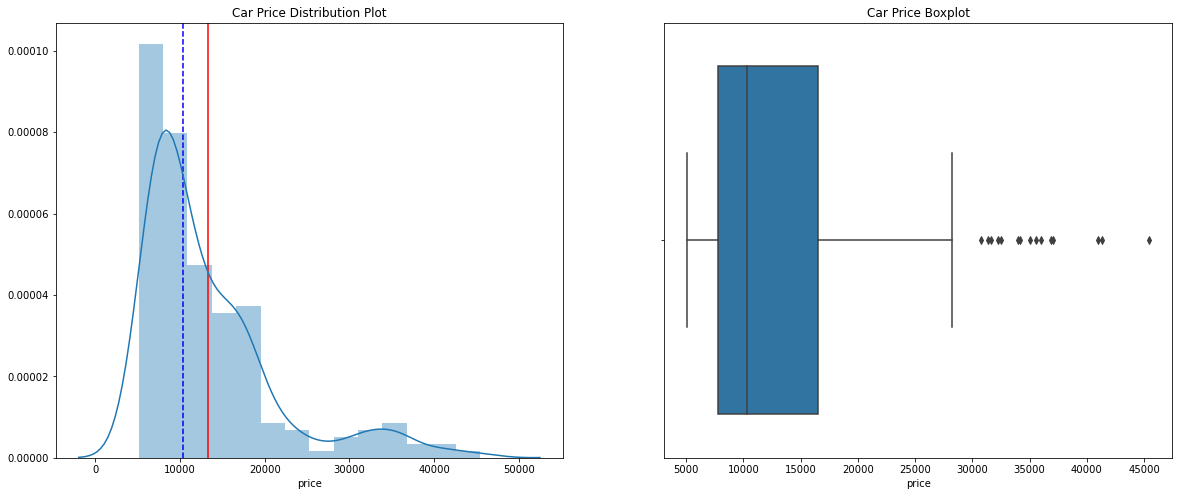

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [8]:
plt.figure(figsize=(20,8))

#plot Car Price Distribution
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
#draw mean and median 
mean = #write your code
median = #write your code
plt.axvline(x=mean,color='red')
plt.axvline(x=median, color='blue',
            ls='--')
sns.distplot(cars['price'])

#Car Price Distribution
plt.subplot(1,2,2)
plt.title('Car Price Boxplot')
sns.boxplot(cars['price'])

plt.show()
cars['price'].describe()

#### What do these plot say to us?

#write your answer

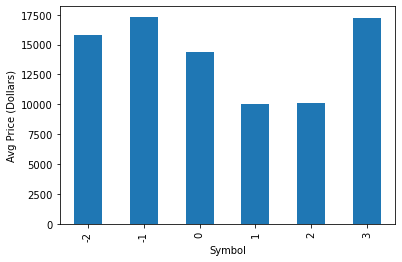

In [9]:
# Let's see average price of cars in each symbol category.
df = #write your code
plt1 = df.plot(kind = 'bar', legend = False)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()

#### Inference
#write your answer

Plot Companies, Fuel Type, and Car Type Histograms

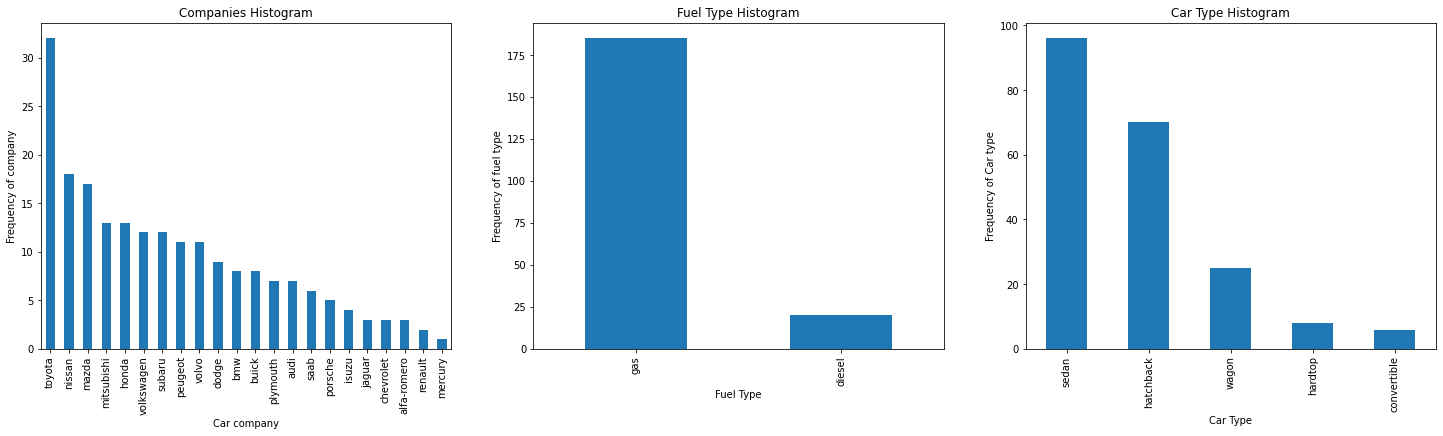

In [10]:
# Visualizaing categorical data

plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = #write your code
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = #write your code
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = #write your code
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

#### Inference :
#write your answer

#### Plot Company Name, Fuel Type, and Car Type vs Average Price

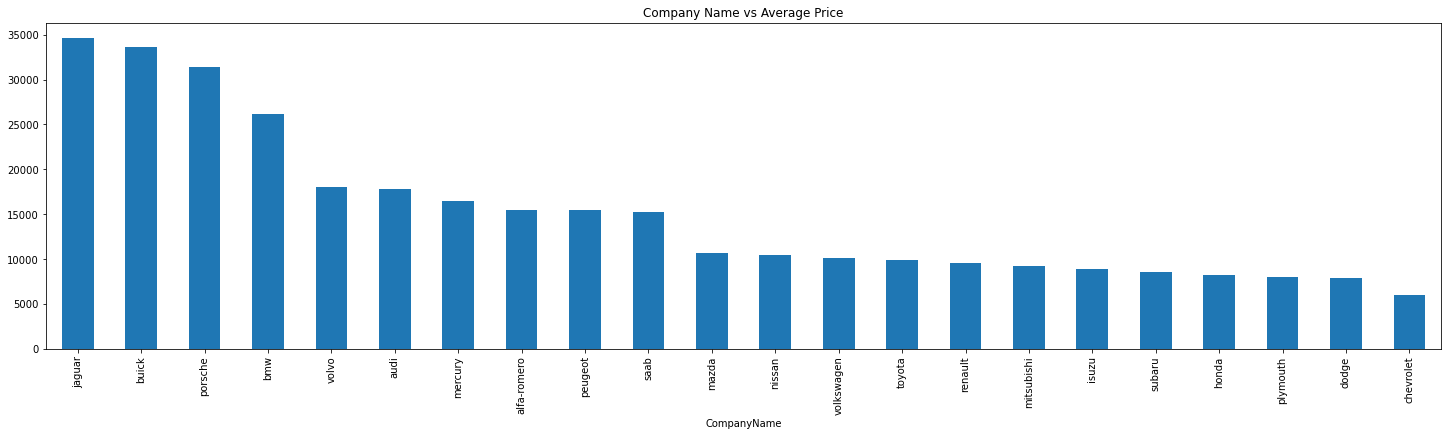

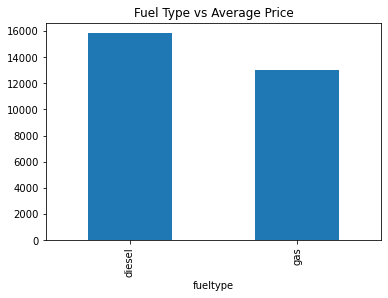

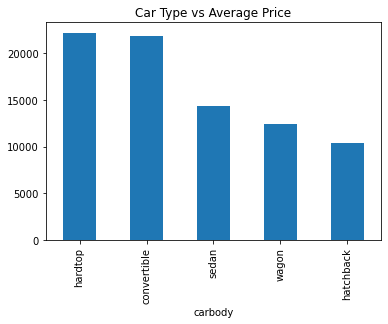

In [19]:
plt.figure(figsize=(25, 6))

df = #write your code
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = #write your code
plt.title('Fuel Type vs Average Price')
plt.show()

df = #write your code
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

### Inference :
#write your answer

Let's pairplot the price against all the other columns

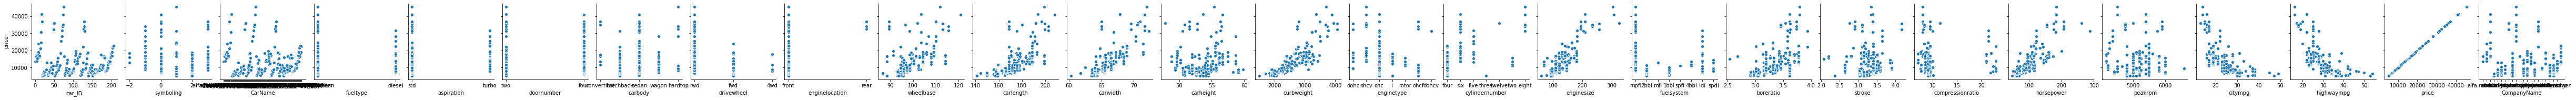

In [20]:
#write your code

Wait! We had to filter out the categorical data

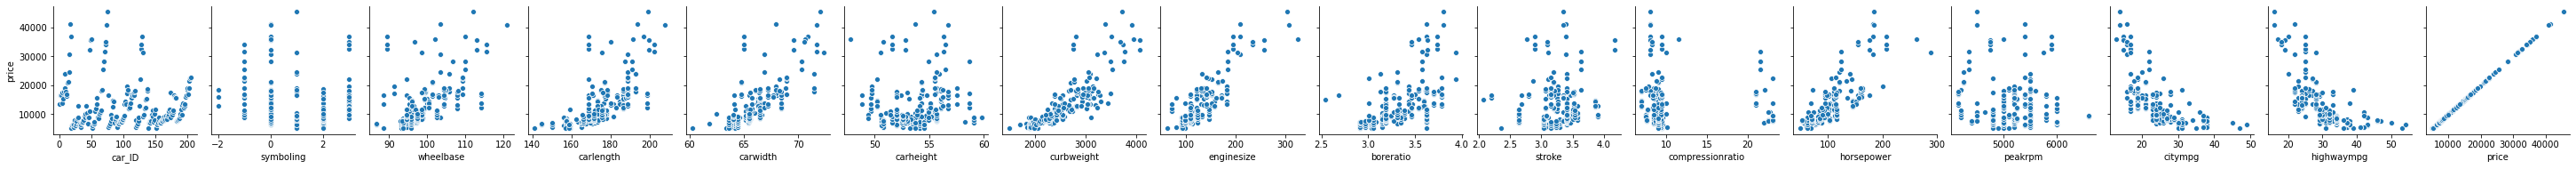

In [21]:
#write your code

#### Inference :
#write your answer

## Feature Engineering

We don't need to limit ourselves to the features that are in the table. We can come up with some hand engineered features, based on our expertise.


##### Feature 1

We can combine features linearly

In [22]:
#Fuel economy
cars['fueleconomy'] = #write your code

# View DataFrame
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,fueleconomy
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,23.70
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,23.70
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,22.15
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,26.70
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,19.80


##### Feature 2

We can create a new feature by grouping characteristics


In [26]:
# Create a new feature by grouping characteristics

# create a group to identify most expensive brands
brands =  #write your code

# select top 5 most expensive brands
expensive_brands =#write your code

# add a column that identifies with 1 if vehicle is one of expensive brands or 0 otherwise
cars['expensive_brand'] =#write your code

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,fueleconomy,expensive_brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,23.70,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,23.70,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,22.15,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,26.70,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,19.80,0


#####  Feature 3

We can use one-hot encoding to convert categorical data into numbers

In [28]:
# Create dummy variables for carbody types
# unique body types
options = #write your code
# convert to category
category_type = #write your code
# match each value to the category
cars.loc[:, 'carbody'] = #write your code
# use pd.get_dummies to automaticaly one hot encode
cars = #write your code

## Modelling

In [29]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'CompanyName', 'fueleconomy', 'expensive_brand', 'Car_body_hatchback',
       'Car_body_sedan', 'Car_body_wagon', 'Car_body_hardtop'],
      dtype='object')

Let's decide which features we do not want to include in our model, based on our EDA and expertise 

In [30]:
# filter to only keep columns of interest
cars = cars.drop(columns = ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'CompanyName',
                            'doornumber', 'drivewheel', 'enginelocation', 'wheelbase', 'enginetype', 
                            'cylindernumber', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
                            'peakrpm', 'citympg', 'highwaympg'])

#### Train-Test Split

In [31]:
# generate training, validation, test sets with 80% training, 10% validation 10% test
train, test = #write your code

# check that train representes 80% of total
print(train.shape[0] / cars.shape[0])

0.8


Separate dependant and independent variables

In [33]:
X_train = #write your code
y_train = #write your code

X_test = #write your code
y_test = #write your code

Define a linear regression model

In [38]:

# Write your code here.


In [39]:
# fit model
#write your code

# predict training data y
#write your code

# predict validation set y
#write your code

### Model Evaluation

#### Define mean absolute error (MAE) as a performance measure 

In [40]:
# MEAN absolute error function
def mae(actual, predicted):
    """
    Calculates MAE from actual and predicted values
    Input:
      actual (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    
    # Write your code here.
    
    return mae

In [42]:
# Write your code here.
training_error = mae(actual=y_train, predicted=y_predicted_train)
test_error = mae(actual=y_test, predicted=y_predicted_test)

# Print answers
print('Training MAE: ${:.2f}'.format(training_error))
print('Test MAE: ${:.2f}'.format(test_error))

Training MAE: $1837.06
Test MAE: $1823.18


In [43]:
print('r2 = {}'.format(r2_score(y_test, y_predicted_test)))

r2 = 0.8375252973197029
